In [1]:
import pandas as pd
import math as m
from IPython.display import display as disp
import lablib as ll
%matplotlib inline

In [2]:
data, columns, experiments = ll.read_standard_layout()

e = "current"

ll.compute(name = "I_full",
           expr = lambda I_full: I_full * 0.250 / 100,
           columns = columns[e],
           data = data[e])

ll.compute(name = "I_L",
           expr = lambda I_L: I_L * 1 / 100,
           columns = columns[e],
           data = data[e])

ll.compute(name = "I_C",
           expr = lambda I_C: I_C * 1 / 100,
           columns = columns[e],
           data = data[e])

disp(data[e], columns[e])

,Value,Error,ErrorRel
C,0.000120,0.000000,0.42%
f,50.000000,0.000000,0.00%
U_full,10.000000,0.250000,2.50%


,x_L,Error_x_L,ErrorRel_x_L,I_full,Error_I_full,ErrorRel_I_full,I_L,Error_I_L,ErrorRel_I_L,I_C,Error_I_C,ErrorRel_I_C
0,50,0.500000,1.00%,0.120000,0.001250,1.04%,0.330000,0.005000,1.52%,0.440000,0.005000,1.14%
1,52,0.500000,0.96%,0.110000,0.001250,1.14%,0.330000,0.005000,1.52%,0.440000,0.005000,1.14%
2,54,0.500000,0.93%,0.102500,0.001250,1.22%,0.350000,0.005000,1.43%,0.440000,0.005000,1.14%
3,56,0.500000,0.89%,0.092500,0.001250,1.35%,0.360000,0.005000,1.39%,0.440000,0.005000,1.14%
4,58,0.500000,0.86%,0.082500,0.001250,1.52%,0.370000,0.005000,1.35%,0.440000,0.005000,1.14%
5,60,0.500000,0.83%,0.075000,0.001250,1.67%,0.380000,0.005000,1.32%,0.440000,0.005000,1.14%
6,62,0.500000,0.81%,0.090000,0.001250,1.39%,0.380000,0.005000,1.32%,0.430000,0.005000,1.16%
7,64,0.500000,0.78%,0.057500,0.001250,2.17%,0.400000,0.005000,1.25%,0.440000,0.005000,1.14%
8,66,0.500000,0.76%,0.052500,0.001250,2.38%,0.420000,0.005000,1.19%,0.440000,0.005000,1.14%
9,68,0.500000,0.74%,0.047500,0.002500,5.26%,0.430000,0.005000,1.16%,0.440000,0.005000,1.14%


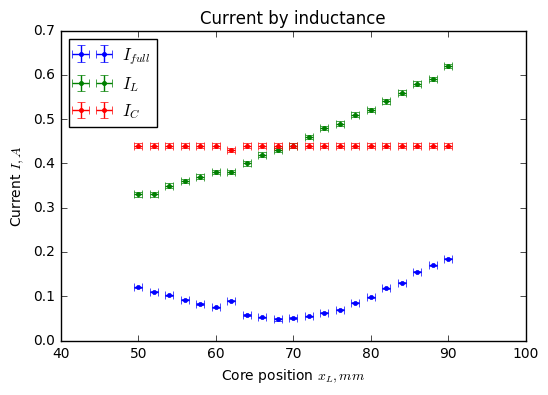

In [3]:
ll.plotfit(title = "Current by inductance", 
           xlabel = "Core position $x_L, mm$",
           ylabel = "Current $I, A$",
           x = "x_L",
           y = ["I_full", "I_L", "I_C"],
           columns = columns[e],
           label = ["$I_{full}$", "$I_L$", "$I_C$"])



In [6]:
resonance = columns[e].loc[lambda s: s.x_L == 70].iloc[0]

ll.add(data[e],
       ll.var(name = "I_res_L", value = resonance["I_L"], error = resonance["Error_I_L"]),
       ll.var(name = "I_res_C", value = resonance["I_C"], error = resonance["Error_I_C"]),
       ll.var(name = "I_res", value = resonance["I_full"], error = resonance["Error_I_full"]))
       
ll.add(data[e],
       ll.var(name = "r_L_f", value = 1.99, error = 0.01),
       ll.var(name = "L_f", value = 75.8 * 10**-3, error = 0.05 ** 10**-3))
    
ll.compute(name = "Q",
           expr = lambda I_res, I_res_C: I_res_C / I_res,
           data = data[e])

ll.compute(name = "Q_f",
           expr = lambda r_L_f, C, f: 1 / (r_L_f * C * 2*m.pi*f),
           data = data[e])
           
           
ll.compute(name = "R_res",
           expr = lambda I_res, U_full: U_full / I_res,
           data = data[e])

ll.compute(name = "L_res_via_meas",
           expr = lambda U_full, f, I_res_L: U_full / (I_res_L * (2*m.pi*f)),
           data = data[e])

ll.compute(name = "L_res_via_C",
           expr = lambda f, C: 1 / ((2*m.pi*f)**2 * C),
           data = data[e])

ll.compute(name = "r_L_via_meas",
           expr = lambda U_full, I_res, I_res_L: U_full * I_res / (I_res_L**2),
           data = data[e])

ll.compute(name = "r_L_via_C",
           expr = lambda f, C, Q: 1 / (2*m.pi*f * C * Q),
           data = data[e])

disp(data[e])


,Value,Error,ErrorRel
C,0.000120,0.000000,0.42%
f,50.000000,0.000000,0.00%
U_full,10.000000,0.250000,2.50%
I_res_L,0.440000,0.005000,1.14%
I_res_C,0.440000,0.005000,1.14%
I_res,0.050000,0.002500,5.00%
Q,8.800000,0.451221,5.13%
R_res,200.000000,11.180340,5.59%
L_res_via_meas,0.072343,0.001987,2.75%
L_res_via_C,0.084434,0.000352,0.42%
